Types of Noise models
1)Gaussian Noise
2)Salt and Pepper Noise
3) Poisson Noise
4)Gamma Noise
5)Rayleigh Noise
6)Exponential Noise
7)Uniform Noise

**Implement various noise models and their Histogram**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ABLUR.jfif to ABLUR.jfif


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Set up Google Colab display
%matplotlib inline

In [ ]:
image = cv2.imread("ABLUR.jfif")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [ ]:
# Generate clean data (e.g., an image)
np.random.seed(42)
clean_data = np.random.random((100, 100))  # Replace with your data

In [ ]:
# Gaussian Noise
mean = 0
stddev = 0.1
gaussian_noise = np.random.normal(mean, stddev, clean_data.shape)
noisy_data_gaussian = clean_data + gaussian_noise

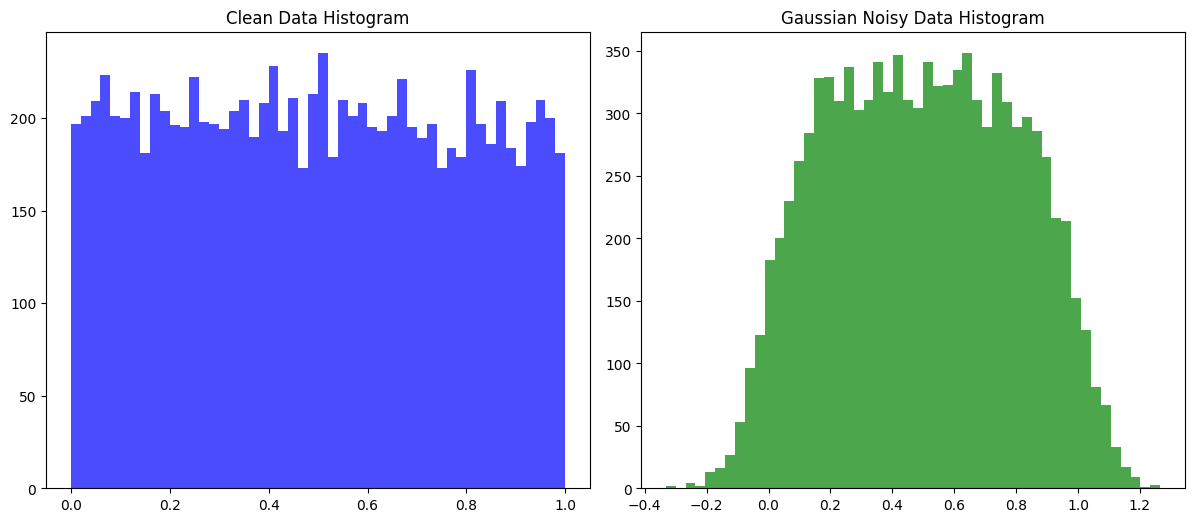

In [ ]:
# Plot histograms
plt.figure(figsize=(18, 15))

plt.subplot(3, 3, 1)
plt.hist(clean_data.ravel(), bins=50, color='blue', alpha=0.7)
plt.title('Clean Data Histogram')

plt.subplot(3, 3, 2)
plt.hist(noisy_data_gaussian.ravel(), bins=50, color='green', alpha=0.7)
plt.title('Gaussian Noisy Data Histogram')

plt.tight_layout()
plt.show()

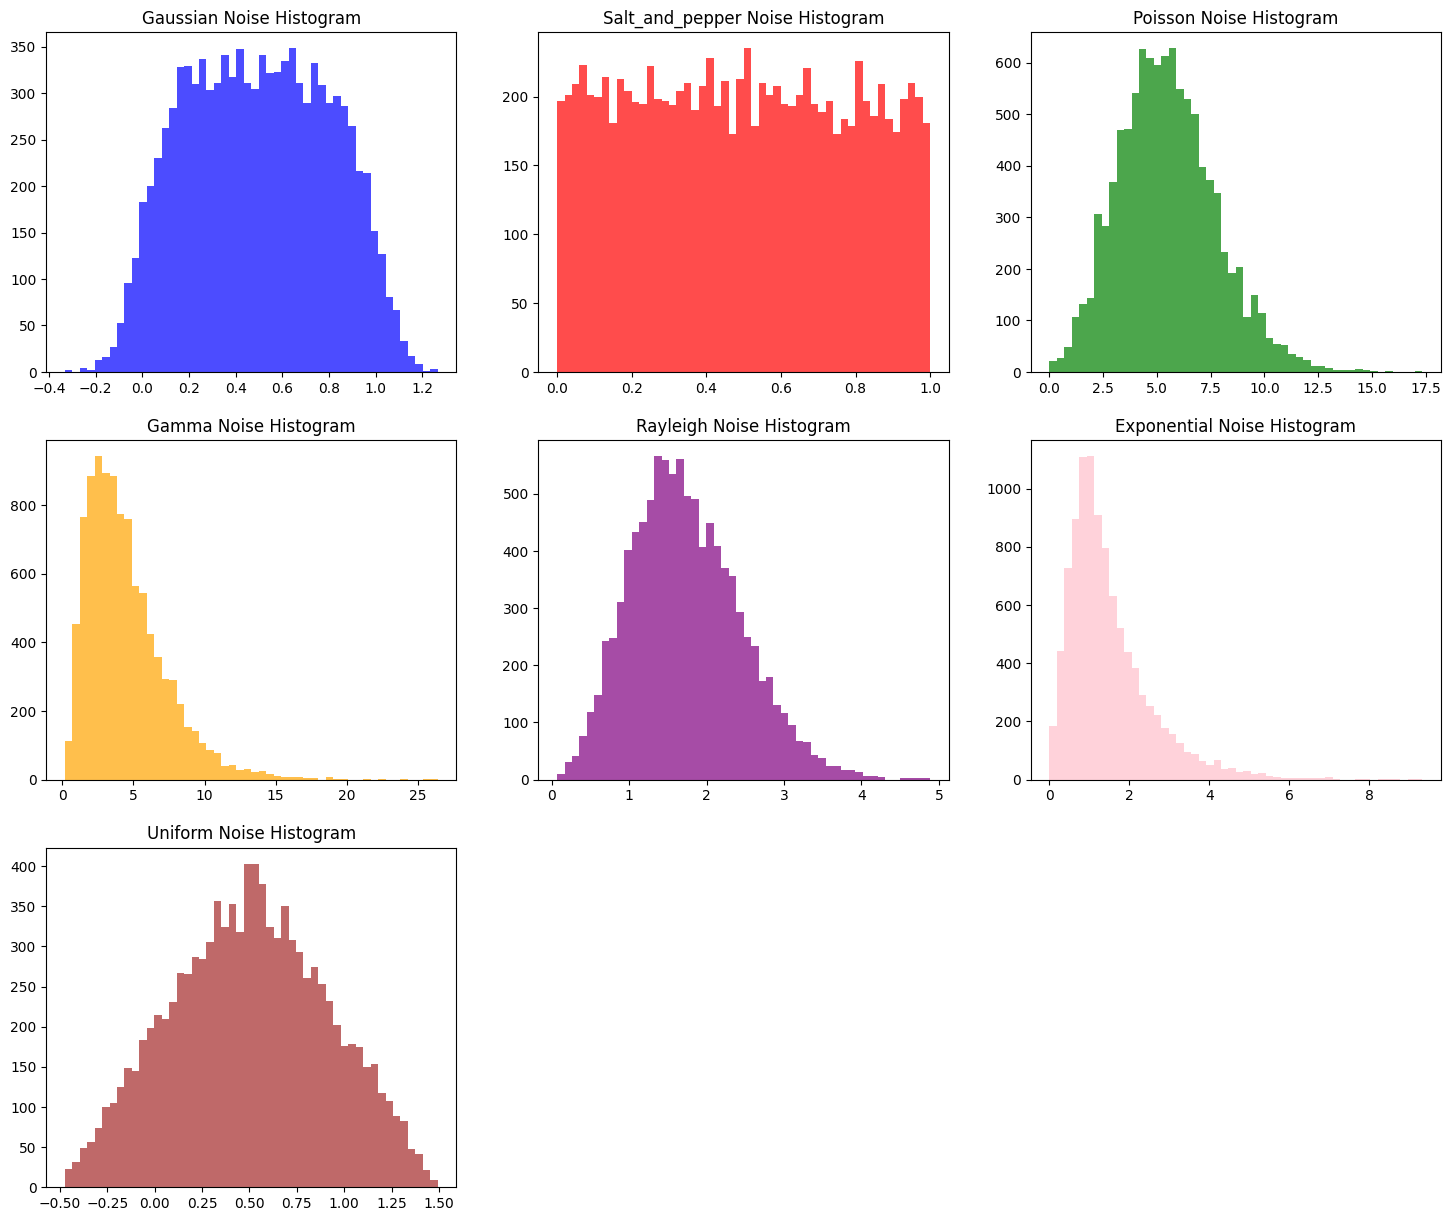

In [ ]:
# Function to add noise to clean data and plot histograms
def add_and_plot_noise(clean_data, noise_type, params, subplot_index):
    if noise_type == 'gaussian':
        noise = np.random.normal(params['mean'], params['stddev'], clean_data.shape)
    elif noise_type == 'salt_and_pepper':
        noise = np.random.choice([0, 1, 2], size=clean_data.shape, p=[params['s_vs_p'], 0.5 - params['s_vs_p'], params['s_vs_p']])
        noise[noise == 1] = params['salt_value']
        noise[noise == 2] = params['pepper_value']
    elif noise_type == 'poisson':
        noise = np.random.poisson(params['lam'], clean_data.shape)
    elif noise_type == 'gamma':
        noise = np.random.gamma(params['shape'], params['scale'], clean_data.shape)
    elif noise_type == 'rayleigh':
        noise = np.random.rayleigh(params['scale'], clean_data.shape)
    elif noise_type == 'exponential':
        noise = np.random.exponential(params['scale'], clean_data.shape)
    elif noise_type == 'uniform':
        noise = np.random.uniform(params['low'], params['high'], clean_data.shape)

    noisy_data = clean_data + noise

    plt.subplot(3, 3, subplot_index)
    plt.hist(noisy_data.ravel(), bins=50, color=params['color'], alpha=0.7)
    plt.title(f'{noise_type.capitalize()} Noise Histogram')

# Generate clean data (e.g., an image)
np.random.seed(42)
clean_data = np.random.random((100, 100))  # Replace with your data

# Define noise parameters
noise_params = {
    'gaussian': {'mean': 0, 'stddev': 0.1, 'color': 'blue'},
    'salt_and_pepper': {'s_vs_p': 0.5, 'salt_value': 1, 'pepper_value': 0, 'color': 'red'},
    'poisson': {'lam': 5, 'color': 'green'},
    'gamma': {'shape': 2, 'scale': 2, 'color': 'orange'},
    'rayleigh': {'scale': 1, 'color': 'purple'},
    'exponential': {'scale': 1, 'color': 'pink'},
    'uniform': {'low': -0.5, 'high': 0.5, 'color': 'brown'}
}

# Plot histograms for each noise type
plt.figure(figsize=(18, 15))

for i, noise_type in enumerate(noise_params.keys(), start=1):
    add_and_plot_noise(clean_data, noise_type, noise_params[noise_type], i)

plt.show()


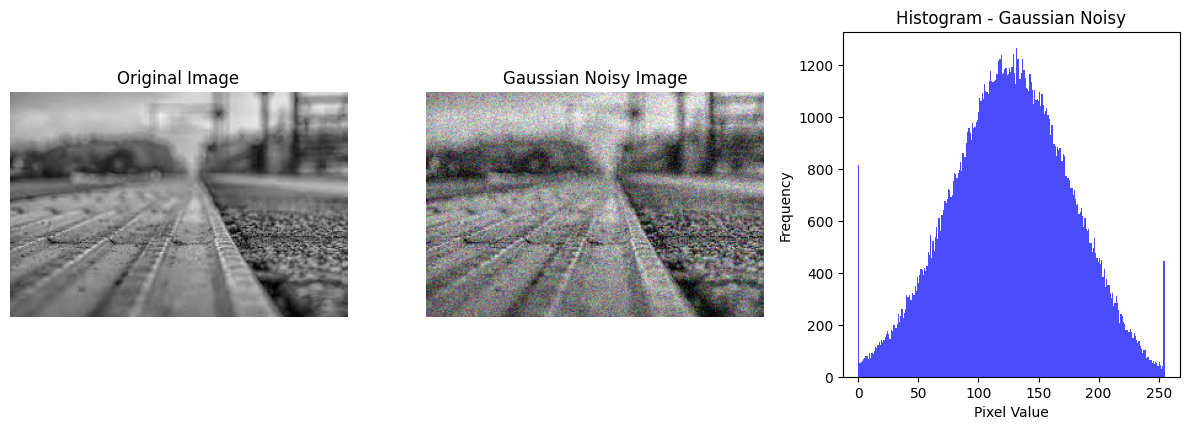

In [ ]:
def gaussian_noise(image, mean=0, std=25):
    row, col, ch = image.shape
    noisy = np.random.normal(mean, std, (row, col, ch))
    noisy_image = np.clip(image + noisy, 0, 255).astype(np.uint8)
    return noisy_image

gaussian_noisy = gaussian_noise(image)

plt.figure(figsize=(12, 8))

plt.subplot(231)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(233)
plt.hist(gaussian_noisy.ravel(), bins=256, range=(0, 255), color='blue', alpha=0.7)
plt.title("Histogram - Gaussian Noisy")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")

plt.subplot(232)
plt.imshow(gaussian_noisy)
plt.title("Gaussian Noisy Image")
plt.axis("off")

plt.tight_layout()
plt.show()

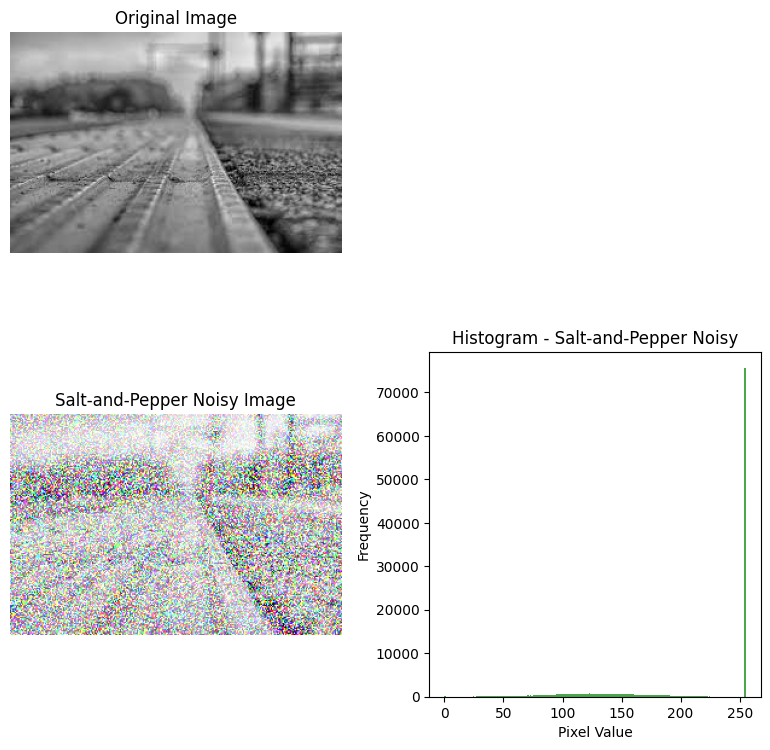

In [ ]:
def salt_and_pepper_noise(image, amount=1):
    row, col, ch = image.shape
    noisy = np.random.choice([0, 255], size=(row, col, ch), p=[amount/2, amount/2])
    noisy_image = np.clip(image + noisy, 0, 255).astype(np.uint8)
    return noisy_image

salt_and_pepper_noisy = salt_and_pepper_noise(image)

plt.figure(figsize=(12, 8))

plt.subplot(231)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(234)
plt.imshow(salt_and_pepper_noisy)
plt.title("Salt-and-Pepper Noisy Image")
plt.axis("off")

plt.subplot(235)
plt.hist(salt_and_pepper_noisy.ravel(), bins=256, range=(0, 255), color='green', alpha=0.7)
plt.title("Histogram - Salt-and-Pepper Noisy")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

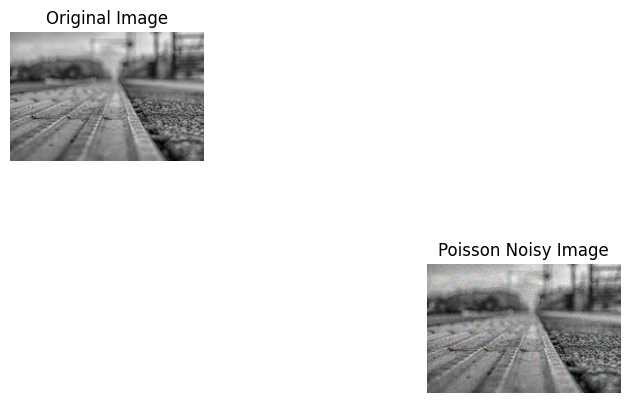

In [ ]:
def poisson_noise(image):
    noisy = np.random.poisson(image)
    noisy_image = np.clip(noisy, 0, 255).astype(np.uint8)
    return noisy_image

poisson_noisy = poisson_noise(image)

plt.subplot(231)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(236)
plt.imshow(poisson_noisy, cmap='gray')
plt.title("Poisson Noisy Image")
plt.axis("off")

plt.tight_layout()
plt.show()